In [1]:
import datasets
ds = datasets.load_dataset('Asap7772/Asap7772open_web_math_backtrack_40k')
ds = ds['train'].train_test_split(0.1)
ds

/home/anikait.singh/miniconda3/envs/zero/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Generating train split: 100%|██████████| 37173/37173 [00:01<00:00, 21129.74 examples/s]


DatasetDict({
    train: Dataset({
        features: ['url', 'text', 'date', 'metadata', 'backtracking_raw', 'is_solution_raw', 'verification_raw', 'subgoal_setting_raw', 'backward_chaining_raw', 'is_backtrack', 'backtrack_count', 'backtrack_rationale', 'is_backchain', 'backchain_count', 'backchain_rationale', 'is_verification', 'verification_count', 'verification_rationale', 'contain_problem', 'contain_solution', 'domain_broad', 'domain_specific', 'solution_rationale', 'raw_qa', 'query', 'completion'],
        num_rows: 33455
    })
    test: Dataset({
        features: ['url', 'text', 'date', 'metadata', 'backtracking_raw', 'is_solution_raw', 'verification_raw', 'subgoal_setting_raw', 'backward_chaining_raw', 'is_backtrack', 'backtrack_count', 'backtrack_rationale', 'is_backchain', 'backchain_count', 'backchain_rationale', 'is_verification', 'verification_count', 'verification_rationale', 'contain_problem', 'contain_solution', 'domain_broad', 'domain_specific', 'solution_rationale', 

In [13]:
import os
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('meta-llama/Llama-3.1-8B')

def get_len(x):
    return len(tokenizer(x)['input_ids'])

def map_fn(x):
    x['length'] = get_len(x['completion'])
    # x['length'] = get_len(x['deepseek_thinking_trajectory']) + get_len(x['deepseek_attempt'])
    return x

ds = ds.filter(lambda x: x['completion'] != '' and x['query'] != '')

ds = ds.map(map_fn, num_proc=os.cpu_count())

Map (num_proc=24): 100%|██████████| 1208/1208 [00:00<00:00, 2143.42 examples/s]


In [14]:
!pip install pandas matplotlib seaborn

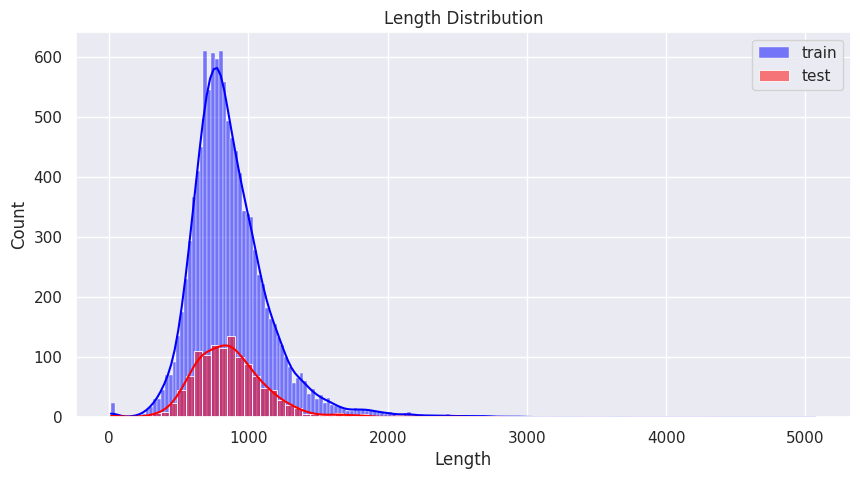

In [15]:
all_train_lengths = [x['length'] for x in ds['train']]
all_test_lengths = [x['length'] for x in ds['test']]

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(figsize=(10, 5))
sns.histplot(all_train_lengths, color='blue', label='train', kde=True)
sns.histplot(all_test_lengths, color='red', label='test', kde=True)
plt.title('Length Distribution')
plt.xlabel('Length')
plt.ylabel('Count')
plt.legend()
plt.show()

In [16]:
ds

DatasetDict({
    train: Dataset({
        features: ['url', 'text', 'date', 'metadata', 'backtracking_raw', 'is_solution_raw', 'verification_raw', 'subgoal_setting_raw', 'backward_chaining_raw', 'is_backtrack', 'backtrack_count', 'backtrack_rationale', 'is_backchain', 'backchain_count', 'backchain_rationale', 'is_verification', 'verification_count', 'verification_rationale', 'contain_problem', 'contain_solution', 'domain_broad', 'domain_specific', 'solution_rationale', 'raw_qa', 'query', 'completion', 'length'],
        num_rows: 11259
    })
    test: Dataset({
        features: ['url', 'text', 'date', 'metadata', 'backtracking_raw', 'is_solution_raw', 'verification_raw', 'subgoal_setting_raw', 'backward_chaining_raw', 'is_backtrack', 'backtrack_count', 'backtrack_rationale', 'is_backchain', 'backchain_count', 'backchain_rationale', 'is_verification', 'verification_count', 'verification_rationale', 'contain_problem', 'contain_solution', 'domain_broad', 'domain_specific', 'solution_ra

In [17]:
print('Stats')
print('Train')
print('  Min:', min(all_train_lengths))
print('  Max:', max(all_train_lengths))
print('  Mean:', sum(all_train_lengths) / len(all_train_lengths))
print('  Median:', sorted(all_train_lengths)[len(all_train_lengths) // 2])

print('Test')
print('  Min:', min(all_test_lengths))
print('  Max:', max(all_test_lengths))
print('  Mean:', sum(all_test_lengths) / len(all_test_lengths))
print('  Median:', sorted(all_test_lengths)[len(all_test_lengths) // 2])


Stats
Train
  Min: 13
  Max: 5073
  Mean: 877.5505817568168
  Median: 823
Test
  Min: 13
  Max: 2815
  Mean: 868.7201986754967
  Median: 842


In [18]:
877.5505817568168 * 11259

9880342.0